Resources:

https://explore-education-statistics.service.gov.uk/find-statistics/leo-graduate-and-postgraduate-outcomes/2022-23

- underlying_data.csv
- international_top20countries_data.csv

Explanations and definitions: https://explore-education-statistics.service.gov.uk/methodology/leo-graduate-outcomes-provider-level-data

https://www.schemecolor.com/tag/autumn

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('default')
import plotly.express as px
import plotly.graph_objects as go

df_full_raw = pd.read_csv("/content/drive/MyDrive/allWomen_DA_bootcamp/_DA-project_/underlying_data.csv")
df_int_raw = pd.read_csv("/content/drive/MyDrive/allWomen_DA_bootcamp/_DA-project_/international_top20countries_data.csv")

In [4]:
df_full = df_full_raw

In [5]:
df_int = df_int_raw

In [6]:
# colour palette:

pal = ['#335c67', '#fff3b0', '#fffff2', '#e09f3e', '#9e2a2b', '#540b0e']

In [74]:
colour_palette = pd.DataFrame({"Color": pal})

In [73]:
# style the dataframe so each row shows its own color

colour_palette_styled = colour_palette.style.apply(
    lambda s: [f"background-color: {c}" for c in s], subset=["Color"]
)

colour_palette_styled

,Color
0,#335c67
1,#fff3b0
2,#fffff2
3,#e09f3e
4,#9e2a2b
5,#540b0e


# **NOTES**

df_full:

- c = data has been suppressed due to small numbers - change to 0
- z = there is no result (N/A) - change to median

<br>

 - 0   time_period - drop
 - 1   time_identifier - drop
 - 2   geographic_level - drop
 - 3   country_code - drop
 - 4   country_name - drop, irrelevant for this comparison
 - 5   region_code_current - drop
 - 6   region_name_current - filter by Total, then drop
 - 7   academic_year - filter 14/15, 18/19, 20/21
 - 8   YAG - keep 1 YAG
 - 9   qualification_level - drop 'Level 7 (taught)', 'Level 7 (research)'
 - 10  country_of_domicile_grouped - UK, EU, non-EU
 - 11  sex
 - 12  subject_name - filter by Total, then drop
 - 13  ethnicity_major - filter by Total, then drop
 - 14  ethnicity_minor - drop
 - 15  inst_type - filter by Total, then drop
 - 16  study_mode - filter by Total, then drop
 - 17  age_band - filter by Total, then drop
 - 18  POLAR4
 - 19  prior_attainment - filter by Total, then drop
 - 20  FSM - Free Student Meals - filter by Total, then drop
 - 21  region_name_origin - filter by Total, then drop
 - 22  residence - filter by Total & Under 21 (for POLAR4 plots)
 - 23  grads
 - 24  grads_uk - included in the outcomes
 - 25  unmatched_percent - drop
 - 26  overseas_percent - drop
 - 27  matched - drop
 - 28  activity_not_captured - drop
 - 29  no_sust_dest - drop
 - 30  sust_emp_only - Sustained employment only - drop
 - 31  sust_emp_with_or_without_fs - Sustained employment with or without further study
 - 32  sust_emp_fs_or_both - Sustained employment further study or both - drop
 - 33  fs_with_or_without_sust_emp - Further study with or without sustained employment - drop
 - 34  earnings_include - drop
 - 35  earnings_LQ - drop
 - 36  earnings_median
 - 37  earnings_UQ


<br>

 df_int:

- c = data has been suppressed due to small numbers - change to 0
- z = there is no result (N/A) - change to median

<br>

* 0 time_period - drop
* 1 time_identifier - drop
* 2 geographic_level - drop
* 3 country_code - drop
* 4 country_name - it's only UK, drop
* 5 academic_year - filter 14/15, 18/19, 20/21
* 6 YAG - filter by 1 YAG
* 7 qualification_level - only First degree and Level 7
* 8 country_of_domicile_grouped - Non_EU, EU, but no UK
* 9 country_of_domicile
* 10 sex
* 11 grads
* 12 grads_uk - included in the outcomes calculation
* 13 unmatched_percent - drop
* 14 overseas_percent - drop
* 15 matched - drop
* 16 activity_not_captured - drop
* 17 no_sust_dest - drop
* 18 sust_emp_only - Sustained employment only - drop
* 19 sust_emp_with_or_without_fs - Sustained employment with or without further study
* 20 sust_emp_fs_or_both - Sustained employment further study or both - drop
* 21 fs_with_or_without_sust_emp - Further study with or without sustained employment - drop
* 22 earnings_include - drop
* 23 earnings_LQ
* 24 earnings_median
* 25 earnings_UQ

**---**
# ***df_full = underlying_data.csv***
**---**


In [9]:
# filter by academic years 2014/2015 (decade ago), 2018/2019 (before covid), 2020/2021 (during / after covid)
# filter by age_band Total, Under 21 (for POLAR4 comparison)
# filter by YAG 1 YAG
# filter by Total where necessary (see notes)

df_full = df_full[
    (df_full['academic_year'].isin(['2014/2015', '2018/2019', '2020/2021'])) &
      (df_full['YAG'] == '1 YAG') &
        (df_full['age_band'].isin(['Total', 'Under 21'])) &
          (df_full[['subject_name', 'region_name_current', 'ethnicity_major', 'inst_type', 'study_mode', 'prior_attainment', 'FSM', 'region_name_origin', 'residence']].eq ('Total').all(axis=1))
      ]

In [10]:
# drop unnecessary columns (see notes)

df_full = df_full.drop(['time_period', 'time_identifier', 'geographic_level', 'country_code', 'country_name',
                        'region_code_current', 'region_name_current', 'subject_name', 'ethnicity_major', 'ethnicity_minor', 'inst_type', 'study_mode',
                        'prior_attainment', 'FSM', 'region_name_origin', 'residence', 'unmatched_percent', 'overseas_percent',
                        'matched', 'activity_not_captured', 'no_sust_dest', 'sust_emp_only', 'sust_emp_fs_or_both',
                        'fs_with_or_without_sust_emp', 'earnings_include', 'earnings_LQ'], axis=1)

In [11]:
# drop 'Level 7 (taught)', 'Level 7 (research)' from qualification_level

df_full = df_full.drop(df_full[df_full['qualification_level'].isin(['Level 7 (taught)', 'Level 7 (research)'])].index)

In [12]:
# rename First-degree to 1 (Bachelors), Level 7 to 2 (Masters), and Level 8 to 3 (Doctorate) and convert to numeric in case correlation needed

df_full['qualification_level'] = df_full['qualification_level'].replace({'First-degree':'1', 'Level 7':'2', 'Level 8':'3'})

In [13]:
df_full['qualification_level'] = pd.to_numeric(df_full['qualification_level'])

In [14]:
# check for c & z

for i, col in enumerate(df_full.columns):
  if df_full.iloc[:, i].isin(['c',]).any():
    print(f"% of c in {col} = {round(df_full.iloc[:, i].isin(['c']).sum() / len(df_full.iloc[:, i]), 2)}")
  if df_full.iloc[:, i].isin(['z']).any():
    print(f"% of z in {col} = {round(df_full.iloc[:, i].isin(['z']).sum() / len(df_full.iloc[:, i]), 2)}")

In [15]:
# convert outcomes columns to numeric

df_full[['sust_emp_with_or_without_fs', 'earnings_median', 'earnings_UQ']] = df_full[['sust_emp_with_or_without_fs', 'earnings_median', 'earnings_UQ']].apply(pd.to_numeric, errors='coerce')

In [16]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 507 to 163872
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   academic_year                144 non-null    object 
 1   YAG                          144 non-null    object 
 2   qualification_level          144 non-null    int64  
 3   country_of_domicile_grouped  144 non-null    object 
 4   sex                          144 non-null    object 
 5   age_band                     144 non-null    object 
 6   POLAR4                       144 non-null    object 
 7   grads                        144 non-null    int64  
 8   grads_uk                     144 non-null    int64  
 9   sust_emp_with_or_without_fs  144 non-null    float64
 10  earnings_median              144 non-null    int64  
 11  earnings_UQ                  144 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 14.6+ KB


In [17]:
# check for dupes

df_full.duplicated(keep=False).sum()

np.int64(0)

# **1. How has the supply of UK graduates changed over the last decade — and what shifts happened after Brexit and COVID?**



# **1a: Graduates supply per region (UK, Non-EU, EU)**

Over the past decade, the UK’s graduate supply has grown steadily (+14%), rising from 396k to 453k. But since 2018/19, growth has flattened.

EU graduate numbers grew until 2018/19 (+17%), but dipped slightly after (−1%), reflecting the combined impact of Brexit and COVID.

In contrast, Non-EU graduates grew strongly (+32% since 2014/15), far outpacing both UK and EU.

Overall, the domestic pipeline remains robust, but the international mix is shifting from EU to Non-EU.

In [18]:
# filter by Total where there is an option

df_full_region_supply = df_full[df_full[['sex', 'POLAR4', 'age_band']].eq ('Total').all(axis=1)].groupby(['academic_year', 'country_of_domicile_grouped'])['grads'].sum().reset_index()
df_full_region_supply

,academic_year,country_of_domicile_grouped,grads
0,2014/2015,EU,35685
1,2014/2015,Non-EU,123515
2,2014/2015,UK,396340
3,2018/2019,EU,41855
4,2018/2019,Non-EU,140580
5,2018/2019,UK,448285
6,2020/2021,EU,41465
7,2020/2021,Non-EU,162840
8,2020/2021,UK,452940


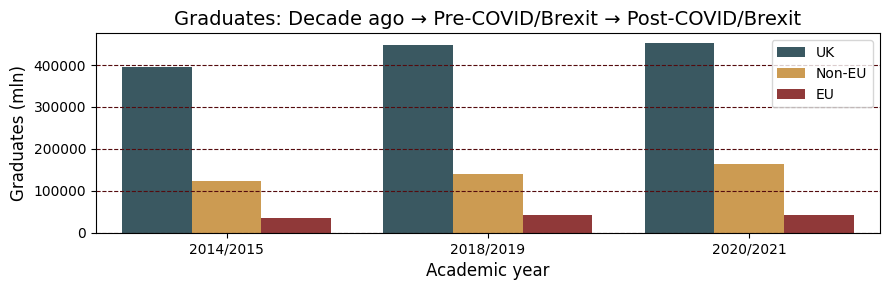

4

In [19]:
plt.figure(figsize=(9,3))
sns.barplot(df_full_region_supply, x='academic_year', y='grads', palette = {'UK': '#335c67','Non-EU': '#e09f3e','EU': '#9e2a2b'}, hue='country_of_domicile_grouped', hue_order=['UK', 'Non-EU', 'EU'])
plt.title('Graduates: Decade ago → Pre-COVID/Brexit → Post-COVID/Brexit', fontsize=14)
plt.ylabel('Graduates (mln)', fontsize=12)
plt.xlabel('Academic year', fontsize=12)
plt.grid(axis='y', linestyle='--', color='#540b0e')
plt.legend(title='', fontsize=10)
plt.tight_layout()
plt.show()

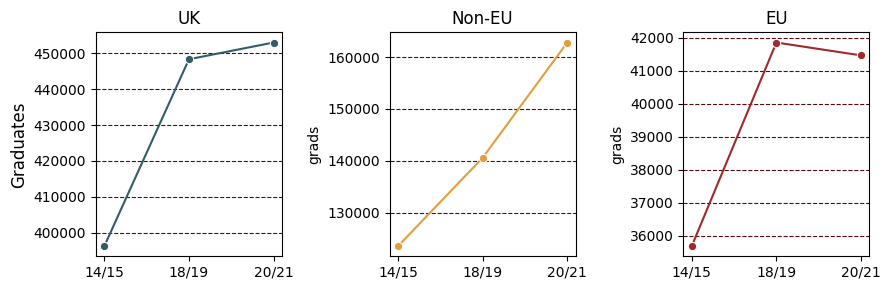

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(9,3))

short_years = ['14/15', '18/19', '20/21']

# UK
sns.lineplot(df_full_region_supply[df_full_region_supply['country_of_domicile_grouped']=='UK'], x='academic_year', y='grads', marker='o', color='#335c67', ax=axes[0])
axes[0].set_title('UK', fontsize=12)
axes[0].set_xticks(range(len(short_years)))
axes[0].set_xticklabels(short_years)
axes[0].set_ylabel('Graduates', fontsize=12)
axes[0].grid(axis='y', linestyle='--', color='#540b0e')
axes[0].set_xticklabels(short_years)

# Non-EU
sns.lineplot(df_full_region_supply[df_full_region_supply['country_of_domicile_grouped']=='Non-EU'], x='academic_year', y='grads', marker='o', color='#e09f3e', ax=axes[1])
axes[1].set_title('Non-EU', fontsize=12)
axes[1].set_xticks(range(len(short_years)))
axes[1].set_xticklabels(short_years)
axes[1].grid(axis='y', linestyle='--', color='#540b0e')

# EU
sns.lineplot(df_full_region_supply[df_full_region_supply['country_of_domicile_grouped']=='EU'], x='academic_year', y='grads', marker='o', color='#9e2a2b', ax=axes[2])
axes[2].set_title('EU', fontsize=12)
axes[2].set_xticks(range(len(short_years)))
axes[2].set_xticklabels(short_years)
axes[2].grid(axis='y', linestyle='--', color='#540b0e')

for ax in axes:
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

# **1b: Graduate supply - gender shifts (all regions)**

Female grads: 316,575 → 369,225 → 386,055 (+22% over the decade)

Male grads: 238,970 → 261,515 → 271,195 (+13% over the decade)

Gender gap:

2014/15: 316k vs 239k → +77k more women

2018/19: 369k vs 262k → +108k more women

2020/21: 386k vs 271k → +115k more women

These plots show that both male and female graduate numbers increased steadily over the decade.

In 2014/15, women outnumbered men by 77k. By 2020/21, that gap had widened to 115k — an increase equivalent to the entire graduating class of a large Russell Group university such as Manchester or Leeds.

Women now account for nearly 6 in 10 UK graduates, showing how the future workforce is increasingly female.

In [21]:
# leave sex as Male and Female for comparison

df_full_gender_supply = df_full[(df_full['sex'] != 'Total') & (df_full[['POLAR4', 'age_band']].eq ('Total').all(axis=1))].groupby(['academic_year', 'sex'])['grads'].sum().reset_index()
df_full_gender_supply

,academic_year,sex,grads
0,2014/2015,Female,316575
1,2014/2015,Male,238970
2,2018/2019,Female,369225
3,2018/2019,Male,261515
4,2020/2021,Female,386055
5,2020/2021,Male,271195


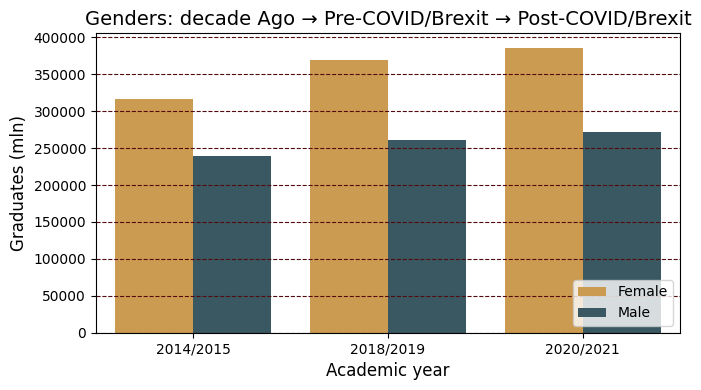

In [22]:
plt.figure(figsize=(7,4))
sns.barplot(df_full_gender_supply, x='academic_year', y='grads', palette = {'Female': '#e09f3e','Male': '#335c67'}, hue='sex')

plt.title('Genders: decade Ago → Pre-COVID/Brexit → Post-COVID/Brexit', fontsize=14)
plt.ylabel('Graduates (mln)', fontsize=12)
plt.xlabel('Academic year', fontsize=12)
plt.grid(axis='y', linestyle='--', color='#540b0e')
plt.legend(title='', loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

# **2. POLAR4 & income shifts, gender comparison**
The participation of local areas (POLAR) classification groups areas across the UK based on the proportion of young people who participate in higher education.

It looks at how likely young people are to participate in higher education across the UK and shows how this varies by area.

POLAR classifies local areas into five groups - or quintiles - based on the proportion of young people who enter higher education aged 18 or 19 years old.

Quintile one shows the lowest rate of participation. Quintile five shows the highest rate of participation.


In [23]:
# filter by POLAR4 measures (1-5) & Male, Female & leave only necessary columns

df_full_polar = df_full[(~df_full['POLAR4'].isin(['Total', 'Not known'])) & (df_full['sex'] != 'Total')][['age_band', 'sex', 'POLAR4', 'earnings_median', 'sust_emp_with_or_without_fs', 'grads_uk', 'academic_year']].copy()
df_full_polar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 163559 to 163822
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_band                     30 non-null     object 
 1   sex                          30 non-null     object 
 2   POLAR4                       30 non-null     object 
 3   earnings_median              30 non-null     int64  
 4   sust_emp_with_or_without_fs  30 non-null     float64
 5   grads_uk                     30 non-null     int64  
 6   academic_year                30 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 1.9+ KB


In [24]:
# convert POLAR4 to numeric

df_full_polar['POLAR4'] = pd.to_numeric(df_full_polar['POLAR4'])
df_full_polar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 163559 to 163822
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age_band                     30 non-null     object 
 1   sex                          30 non-null     object 
 2   POLAR4                       30 non-null     int64  
 3   earnings_median              30 non-null     int64  
 4   sust_emp_with_or_without_fs  30 non-null     float64
 5   grads_uk                     30 non-null     int64  
 6   academic_year                30 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.9+ KB


In [25]:
# filter by 2014/2015

df_full_polar_14_15 = df_full_polar[df_full_polar['academic_year'] == '2014/2015']
df_full_polar_14_15

,age_band,sex,POLAR4,earnings_median,sust_emp_with_or_without_fs,grads_uk,academic_year
163569,Under 21,Female,5,20100,82.7,36985,2014/2015
163582,Under 21,Female,1,17200,86.7,11670,2014/2015
163595,Under 21,Male,4,20400,80.0,20735,2014/2015
163614,Under 21,Male,5,21900,78.8,31155,2014/2015
163668,Under 21,Female,2,17500,86.5,16785,2014/2015
163732,Under 21,Male,3,19700,81.1,16220,2014/2015
163777,Under 21,Male,2,18600,80.9,12285,2014/2015
163784,Under 21,Female,4,19000,84.6,26265,2014/2015
163793,Under 21,Female,3,18200,85.3,21115,2014/2015
163795,Under 21,Male,1,18200,82.1,7975,2014/2015


In [26]:
# filter by 2018/2019

df_full_polar_18_19 = df_full_polar[df_full_polar['academic_year'] == '2018/2019']
df_full_polar_18_19

,age_band,sex,POLAR4,earnings_median,sust_emp_with_or_without_fs,grads_uk,academic_year
163559,Under 21,Male,2,20100,77.9,13755,2018/2019
163561,Under 21,Female,1,18600,83.8,14465,2018/2019
163562,Under 21,Female,4,20100,81.3,29785,2018/2019
163586,Under 21,Female,3,19700,82.6,24680,2018/2019
163670,Under 21,Male,4,21500,76.0,22415,2018/2019
163674,Under 21,Female,5,21500,80.2,40660,2018/2019
163804,Under 21,Female,2,19000,83.9,19985,2018/2019
163812,Under 21,Male,1,19300,77.9,9145,2018/2019
163818,Under 21,Male,3,20400,77.5,17390,2018/2019
163821,Under 21,Male,5,22600,75.6,34045,2018/2019


In [27]:
# filter by 2020/2021

df_full_polar_20_21 = df_full_polar[df_full_polar['academic_year'] == '2020/2021']
df_full_polar_20_21

,age_band,sex,POLAR4,earnings_median,sust_emp_with_or_without_fs,grads_uk,academic_year
163568,Under 21,Female,5,25200,82.6,40495,2020/2021
163575,Under 21,Male,1,23400,81.9,9330,2020/2021
163671,Under 21,Male,5,27000,79.6,34670,2020/2021
163675,Under 21,Male,2,24100,81.8,13920,2020/2021
163676,Under 21,Male,3,24800,81.8,17795,2020/2021
163739,Under 21,Male,4,25600,80.3,22530,2020/2021
163779,Under 21,Female,2,23000,85.8,20015,2020/2021
163800,Under 21,Female,1,22300,86.1,14755,2020/2021
163802,Under 21,Female,3,23400,85.1,24160,2020/2021
163822,Under 21,Female,4,24100,84.2,29885,2020/2021


## **2a: The gender pay gap widens at higher POLAR4 quintiles**

2014/15: Male £21.9k vs Female £20.1k → Gap £1.8k (−8.2%)

2018/19: Male £22.6k vs Female £21.5k → Gap £1.1k (−4.9%)

2020/21: Male £27.0k vs Female £25.2k → Gap £1.8k (−6.7%)

Over the last decade, the gender pay gap has persisted across every POLAR4 quintile.

At the top quintile, men earned £1.8k more in 2014/15 (−8%). The gap narrowed slightly to £1.1k by 2018/19 (−5%), but widened again to £1.8k (−7%) in 2020/21.

The gap isn’t closing — it’s bouncing back, it's persistent, cyclical, and sharpest among the most advantaged graduates — showing that even opportunity does not equal equality.

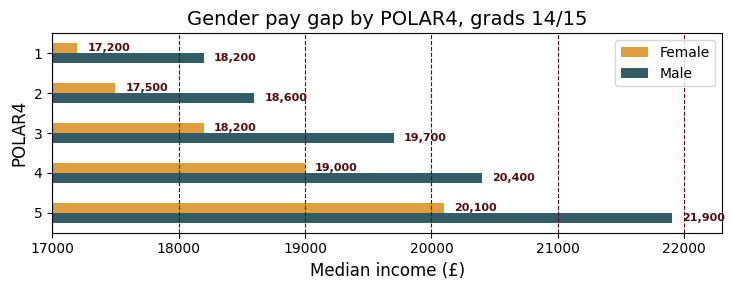

In [71]:
# Pivot, keep Female above Male in bars & legend 14/15

df_full_polar_14_15_gap = df_full_polar_14_15.pivot(index='POLAR4', columns='sex', values='earnings_median')
df_full_polar_14_15_gap = df_full_polar_14_15_gap.sort_index(ascending=False)

ax = df_full_polar_14_15_gap[['Male', 'Female']].plot(kind='barh', color={'Female': '#e09f3e','Male': '#335c67'}, figsize=(7.5,3))

ax.set_title('Gender pay gap by POLAR4, grads 14/15', fontsize=14)
ax.set_xlabel('Median income (£)', fontsize=12)
ax.set_ylabel('POLAR4', fontsize=12)
ax.set_xlim(17000, 22300)
ax.set_xticks([17000, 18000, 19000, 20000, 21000, 22000])
ax.grid(axis='x', linestyle='--', color='#540b0e')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='', loc='upper right', fontsize=10)


for c in ax.containers:
    for b in c:
        ax.text(b.get_width()+80, b.get_y()+b.get_height() * 0.5,
                f'{int(b.get_width()):,}',
                va='center', ha='left',
                fontsize=8, fontweight='bold', color='#540b0e')

plt.tight_layout()
plt.show()

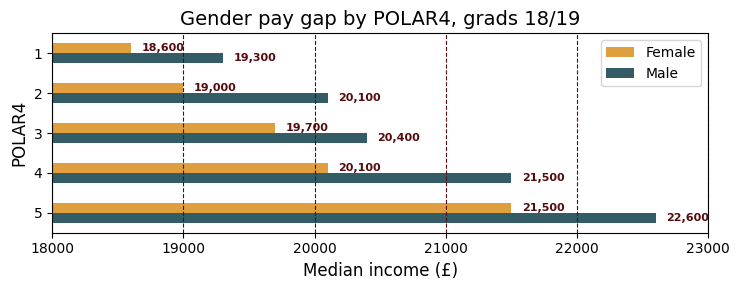

In [29]:
# Pivot, keep Female above Male in bars & legend 18/19

df_full_polar_18_19_gap = df_full_polar_18_19.pivot(index='POLAR4', columns='sex', values='earnings_median')
df_full_polar_18_19_gap = df_full_polar_18_19_gap.sort_index(ascending=False)


ax = df_full_polar_18_19_gap[['Male', 'Female']].plot(kind='barh', color={'Female': '#e09f3e','Male': '#335c67'}, figsize=(7.5,3))


ax.set_title('Gender pay gap by POLAR4, grads 18/19', fontsize=14)
ax.set_xlabel('Median income (£)', fontsize=12)
ax.set_ylabel('POLAR4', fontsize=12)
ax.set_xlim(18000, 23000)
ax.set_xticks([18000, 19000, 20000, 21000, 22000, 23000])
ax.grid(axis='x', linestyle='--', color='#540b0e')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='', loc='upper right', fontsize=10)


for c in ax.containers:
    for b in c:
        ax.text(b.get_width()+80, b.get_y()+b.get_height() * 0.5,
                f'{int(b.get_width()):,}',
                va='center', ha='left',
                fontsize=8, fontweight='bold', color='#540b0e')

plt.tight_layout()
plt.show()

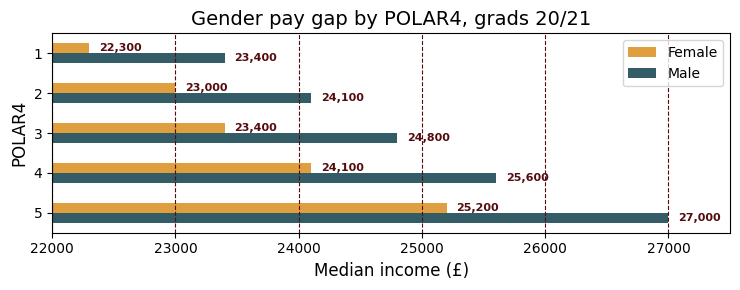

In [30]:
# Pivot, keep Female above Male in bars & legend 20/21

df_full_polar_20_21_gap = df_full_polar_20_21.pivot(index='POLAR4', columns='sex', values='earnings_median')
df_full_polar_20_21_gap = df_full_polar_20_21_gap.sort_index(ascending=False)


ax = df_full_polar_20_21_gap[['Male', 'Female']].plot(kind='barh', color={'Female': '#e09f3e','Male': '#335c67'}, figsize=(7.5,3))


ax.set_title('Gender pay gap by POLAR4, grads 20/21', fontsize=14)
ax.set_xlabel('Median income (£)', fontsize=12)
ax.set_ylabel('POLAR4', fontsize=12)
ax.set_xlim(22000, 27500)
ax.set_xticks([22000, 23000, 24000, 25000, 26000, 27000])
ax.grid(axis='x', linestyle='--', color='#540b0e')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title='', loc='upper right', fontsize=10)


for c in ax.containers:
    for b in c:
        ax.text(b.get_width()+80, b.get_y()+b.get_height() * 0.5,
                f'{int(b.get_width()):,}',
                va='center', ha='left',
                fontsize=8, fontweight='bold', color='#540b0e')

plt.tight_layout()
plt.show()

## **2b: Women = higher stability but lower pay; Men = higher pay but lower stability - trade-off?**

Sustained employment (2014–21): Women 83–86% vs. Men 75–82%

Earnings (2014–21): Women £17.2k–25.2k vs. Men £18.2k–27.0k

Women demonstrate +4–8% higher sustained employment, yet are paid 5–10% less at every stage.

The labour market seems to force a choice between security and earnings — and this choice plays out differently by gender: Women, who often carry greater responsibilities such as childcare and elder care, are compelled to prioritise stability. Men, meanwhile, are freer to take risks, switch roles, and chase higher pay.

The paradox is stark: women provide the more reliable workforce, but men are financially rewarded despite being less stable. In other words, the labour market isn’t recognising — or properly rewarding — women’s contribution.

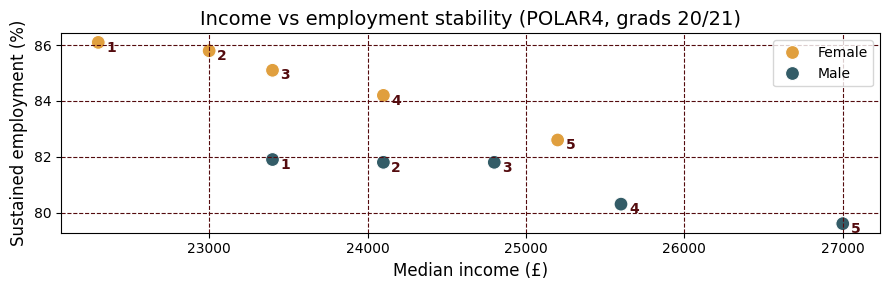

In [31]:
plt.figure(figsize=(9,3))
sns.scatterplot(df_full_polar_20_21, x='earnings_median', y='sust_emp_with_or_without_fs', hue='sex', palette={'Female': '#e09f3e','Male': '#335c67'}, s=100)
plt.title('Income vs employment stability (POLAR4, grads 20/21)', fontsize=14)
plt.xlabel('Median income (£)', fontsize=12)
plt.ylabel('Sustained employment (%)', fontsize=12)
plt.legend(title='', fontsize=10)
plt.grid(axis='both', linestyle='--', color='#540b0e')

for i, row in df_full_polar_20_21.iterrows():
    plt.text(
        row['earnings_median']+50,
        row['sust_emp_with_or_without_fs']-0.33,
        str(int(row['POLAR4'])),
        fontsize=10,
        fontweight='bold',
        color='#540b0e',
        ha='left'
    )
plt.tight_layout()
plt.show()

## **2c: Highest income comparison by gender and qualification level**

At bachelor’s level, parity once looked possible — women were only £1.5k behind in 2014/15. But by 2020/21, the gap had widened to nearly £5k. The dream of parity slipped away.

At master’s level, the already big gap (£8k) shrank briefly, only to explode to £14.6k by 2020/21.

At doctorate level, women’s pay rose strongly (up £9.1k), but men pulled even further ahead, with the gap more than doubling to £10.9k.

The more women achieve, the more the system penalises them. At the highest levels, inequality doesn’t shrink — it accelerates. In fact, the price of higher education is higher inequality — every extra qualification widens the pay gap for women.

## **2c1: UK, EU & Non-EU**

In [32]:
# group by sex, year and highest income, filter by Total where possible, split by qualification

df_full_high_income_1 = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 1) & (df_full[['POLAR4', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
df_full_high_income_1

,sex,academic_year,earnings_UQ
0,Female,2014/2015,32100
1,Female,2018/2019,36500
2,Female,2020/2021,35400
3,Male,2014/2015,33600
4,Male,2018/2019,40900
5,Male,2020/2021,40200


In [33]:
df_full_high_income_2 = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 2) & (df_full[['POLAR4', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
df_full_high_income_2

,sex,academic_year,earnings_UQ
0,Female,2014/2015,33600
1,Female,2018/2019,39400
2,Female,2020/2021,39400
3,Male,2014/2015,42000
4,Male,2018/2019,47400
5,Male,2020/2021,54000


In [34]:
df_full_high_income_3 = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 3) & (df_full[['POLAR4', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
df_full_high_income_3

,sex,academic_year,earnings_UQ
0,Female,2014/2015,37300
1,Female,2018/2019,42700
2,Female,2020/2021,46400
3,Male,2014/2015,42000
4,Male,2018/2019,47100
5,Male,2020/2021,57300


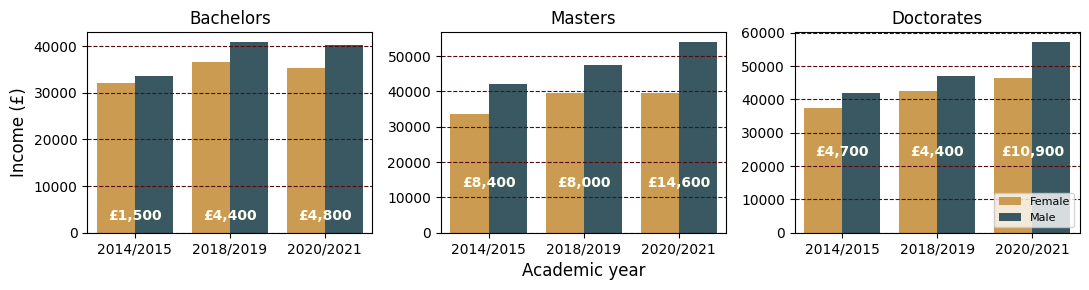

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(11,3))

sns.barplot(data=df_full_high_income_1, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#e09f3e','Male': '#335c67'}, ax=axes[0])
axes[0].set_title('Bachelors', fontsize=12)
axes[0].set_xlabel('')
axes[0].set_ylabel('Income (£)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', color='#540b0e')

income_pivot1 = df_full_high_income_1.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
for i, row in income_pivot1.iterrows():
    gap = abs(row['Male'] - row['Female'])
    axes[0].text(i, 2000, f'£{gap:,.0f}', ha='center', va='bottom', color='#fffff2', fontsize=10, fontweight='bold')

axes[0].legend_.remove()

sns.barplot(data=df_full_high_income_2, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#e09f3e','Male': '#335c67'}, ax=axes[1])
axes[1].set_title('Masters', fontsize=12)
axes[1].set_xlabel('Academic year', fontsize=12)
axes[1].set_ylabel('')
axes[1].grid(axis='y', linestyle='--', color='#540b0e')

income_pivot2 = df_full_high_income_2.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
for i, row in income_pivot2.iterrows():
    gap = abs(row['Male'] - row['Female'])
    axes[1].text(i, 12000, f'£{gap:,.0f}', ha='center', va='bottom', color='#fffff2', fontsize=10, fontweight='bold')

axes[1].legend_.remove()

sns.barplot(data=df_full_high_income_3, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#e09f3e','Male': '#335c67'}, ax=axes[2])
axes[2].set_title('Doctorates', fontsize=12)
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].grid(axis='y', linestyle='--', color='#540b0e')

income_pivot3 = df_full_high_income_3.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
for i, row in income_pivot3.iterrows():
    gap = abs(row['Male'] - row['Female'])
    axes[2].text(i, 22000, f'£{gap:,.0f}', ha='center', va='bottom', color='#fffff2', fontsize=10, fontweight='bold')

axes[2].legend(loc='lower right', title='', fontsize=8)

plt.tight_layout()
plt.show()

## **2c2: UK** - won't use, will use EU

Bachelors (L1)
- 2014/15: F £24,200 | M £27,400 | gap £3,200 (13.2%)
- 2018/19: F £27,000 | M £28,800 | gap £1,800 (6.7%)
- 2020/21: F £30,300 | M £33,600 | gap £3,300 (10.9%)

Masters (L2)
- 2014/15: F £33,600 | M £42,000 | gap £8,400 (25.0%)
- 2018/19: F £36,100 | M £43,400 | gap £7,300 (20.2%)
- 2020/21: F £38,700 | M £47,400 | gap £8,700 (22.5%)

Doctorates (L3)
- 2014/15: F £37,300 | M £42,000 | gap £4,700 (12.6%)
- 2018/19: F £42,700 | M £47,100 | gap £4,400 (10.3%)
- 2020/21: F £46,400 | M £53,700 | gap £7,300 (15.7%)

In the UK, bachelor’s graduates face a modest but persistent gap, which balloons at the master’s stage (~£7–9k). Doctorates earn women more, but the gap still widens again after 2018/19. Inequality isn’t linear — it’s entrenched, especially at master’s where it's at its widest.

The master’s stage is where the gender penalty is sharpest and most resistant to change.

In [36]:
# filter highest income by gender further, by UK

# df_full_high_income_1_uk = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 1) & (df_full['country_of_domicile_grouped'] == 'UK') & (df_full[['POLAR4', 'region_name_origin', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
# df_full_high_income_1_uk

In [37]:
# df_full_high_income_2_uk = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 2) & (df_full['country_of_domicile_grouped'] == 'UK') & (df_full[['POLAR4', 'region_name_origin', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
# df_full_high_income_2_uk

In [38]:
# df_full_high_income_3_uk = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 3) & (df_full['country_of_domicile_grouped'] == 'UK') & (df_full[['POLAR4', 'region_name_origin', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
# df_full_high_income_3_uk

In [39]:
# fig, axes = plt.subplots(1, 3, figsize=(11,3))

# sns.barplot(data=df_full_high_income_1_uk, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#A17F96','Male': '#9AB988'}, ax=axes[0])
# axes[0].set_title('Bachelors UK', fontsize=12)
# axes[0].set_xlabel('')
# axes[0].set_ylabel('Income (£)', fontsize=12)
# axes[0].grid(axis='y', linestyle='--', color='#572318')

# income_pivot1 = df_full_high_income_1_uk.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
# for i, row in income_pivot1.iterrows():
#     gap = abs(row['Male'] - row['Female'])
#     axes[0].text(i, 2000, f'£{gap:,.0f}', ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# axes[0].legend_.remove()

# sns.barplot(data=df_full_high_income_2_uk, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#A17F96','Male': '#9AB988'}, ax=axes[1])
# axes[1].set_title('Masters UK', fontsize=12)
# axes[1].set_xlabel('Academic year', fontsize=12)
# axes[1].set_ylabel('')
# axes[1].grid(axis='y', linestyle='--', color='#572318')

# income_pivot2 = df_full_high_income_2_uk.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
# for i, row in income_pivot2.iterrows():
#     gap = abs(row['Male'] - row['Female'])
#     axes[1].text(i, 12000, f'£{gap:,.0f}', ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# axes[1].legend_.remove()

# sns.barplot(data=df_full_high_income_3_uk, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#A17F96','Male': '#9AB988'}, ax=axes[2])
# axes[2].set_title('Doctorates UK', fontsize=12)
# axes[2].set_xlabel('')
# axes[2].set_ylabel('')
# axes[2].grid(axis='y', linestyle='--', color='#572318')

# income_pivot3 = df_full_high_income_3_uk.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
# for i, row in income_pivot3.iterrows():
#     gap = abs(row['Male'] - row['Female'])
#     axes[2].text(i, 22000, f'£{gap:,.0f}', ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# axes[2].legend(loc='lower right', title='', fontsize=8)

# plt.tight_layout()
# plt.show()

## **2c2: EU**

Masters (L2)
- 2014/15: F £31,000 | M £41,600 | gap £10,600 (25.5%)
- 2018/19: F £34,700 | M £47,100 | gap £12,400 (26.3%)
- 2020/21: F £39,400 | M £54,000 | gap £14,600 (27%) ← largest absolute & percent gap


The EU story is the harshest of all women start closer, but men’s gains outpace them at every level.

At master’s level, women hit a glass ceiling: their max pay stalls at £39k while men soar to £54k.

In [40]:
# filter highest income by gender further, by EU

df_full_high_income_1_eu = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 1) & (df_full['country_of_domicile_grouped'] == 'EU') & (df_full[['POLAR4', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
df_full_high_income_1_eu

,sex,academic_year,earnings_UQ
0,Female,2014/2015,26600
1,Female,2018/2019,29200
2,Female,2020/2021,32500
3,Male,2014/2015,31800
4,Male,2018/2019,36100
5,Male,2020/2021,40200


In [41]:
df_full_high_income_2_eu = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 2) & (df_full['country_of_domicile_grouped'] == 'EU') & (df_full[['POLAR4', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
df_full_high_income_2_eu

,sex,academic_year,earnings_UQ
0,Female,2014/2015,31000
1,Female,2018/2019,34700
2,Female,2020/2021,39400
3,Male,2014/2015,41600
4,Male,2018/2019,47100
5,Male,2020/2021,54000


In [42]:
df_full_high_income_3_eu = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 3) & (df_full['country_of_domicile_grouped'] == 'EU') & (df_full[['POLAR4', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
df_full_high_income_3_eu

,sex,academic_year,earnings_UQ
0,Female,2014/2015,35800
1,Female,2018/2019,41600
2,Female,2020/2021,46400
3,Male,2014/2015,41200
4,Male,2018/2019,46700
5,Male,2020/2021,57300


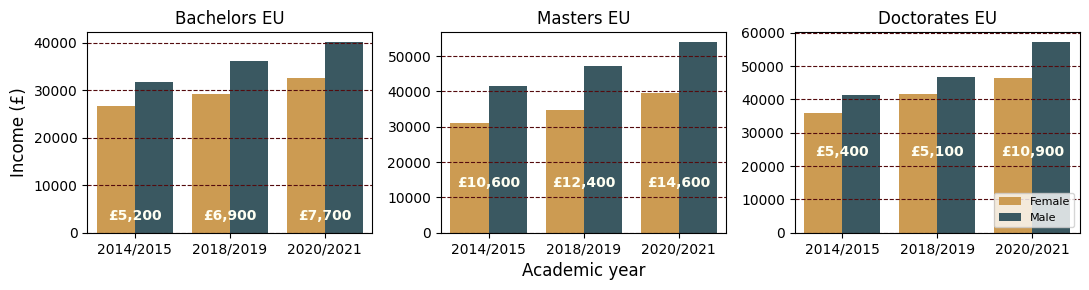

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(11,3))

sns.barplot(data=df_full_high_income_1_eu, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#e09f3e','Male': '#335c67'}, ax=axes[0])
axes[0].set_title('Bachelors EU', fontsize=12)
axes[0].set_xlabel('')
axes[0].set_ylabel('Income (£)', fontsize=12)
axes[0].grid(axis='y', linestyle='--', color='#540b0e')

income_pivot1 = df_full_high_income_1_eu.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
for i, row in income_pivot1.iterrows():
    gap = abs(row['Male'] - row['Female'])
    axes[0].text(i, 2000, f'£{gap:,.0f}', ha='center', va='bottom', color='#fffff2', fontsize=10, fontweight='bold')

axes[0].legend_.remove()

sns.barplot(data=df_full_high_income_2_eu, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#e09f3e','Male': '#335c67'}, ax=axes[1])
axes[1].set_title('Masters EU', fontsize=12)
axes[1].set_xlabel('Academic year', fontsize=12)
axes[1].set_ylabel('')
axes[1].grid(axis='y', linestyle='--', color='#540b0e')

income_pivot2 = df_full_high_income_2_eu.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
for i, row in income_pivot2.iterrows():
    gap = abs(row['Male'] - row['Female'])
    axes[1].text(i, 12000, f'£{gap:,.0f}', ha='center', va='bottom', color='#fffff2', fontsize=10, fontweight='bold')

axes[1].legend_.remove()

sns.barplot(data=df_full_high_income_3_eu, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#e09f3e','Male': '#335c67'}, ax=axes[2])
axes[2].set_title('Doctorates EU', fontsize=12)
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].grid(axis='y', linestyle='--', color='#540b0e')

income_pivot3 = df_full_high_income_3_eu.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
for i, row in income_pivot3.iterrows():
    gap = abs(row['Male'] - row['Female'])
    axes[2].text(i, 22000, f'£{gap:,.0f}', ha='center', va='bottom', color='#fffff2', fontsize=10, fontweight='bold')

axes[2].legend(loc='lower right', title='', fontsize=8)

plt.tight_layout()
plt.show()

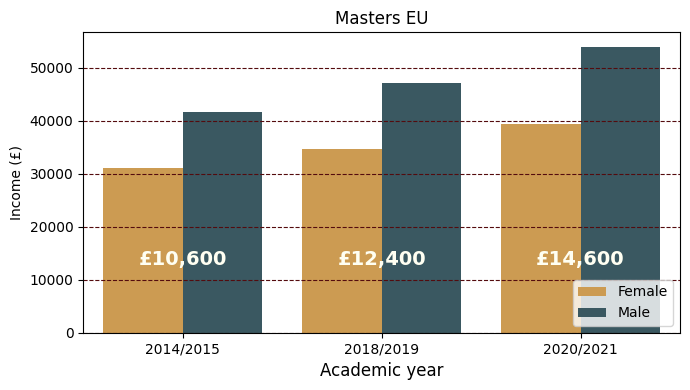

In [44]:
# zoom in further on Masters EU

plt.figure(figsize=(7,4))

sns.barplot(df_full_high_income_2_eu, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#e09f3e','Male': '#335c67'})
plt.title('Masters EU', fontsize=12)
plt.xlabel('Academic year', fontsize=12)
plt.ylabel('Income (£)')
plt.legend(title='', loc='lower right', fontsize=10)
plt.grid(axis='y', linestyle='--', color='#540b0e')

income_pivot2 = df_full_high_income_2_eu.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
for i, row in income_pivot2.iterrows():
    gap = abs(row['Male'] - row['Female'])
    plt.text(i, 12000, f'£{gap:,.0f}', ha='center', va='bottom', color='#fffff2', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## **2c4: Non-EU** - won't use, will use EU

Bachelors (L1)
- 2014/15: F £32,100 | M £33,600 | gap £1,500 (4.7%)
- 2018/19: F £36,500 | M £40,900 | gap £4,400 (12.1%)
- 2020/21: F £35,400 | M £37,600 | gap £2,200 (6.2%)

Masters (L2)
- 2014/15: F £33,600 | M £41,600 | gap £8,000 (23.8%)
- 2018/19: F £39,400 | M £47,400 | gap £8,000 (20.3%)
- 2020/21: F £38,200 | M £38,700 | gap £500 (1.3%) ← very close, but men still £500 higher

Doctorates (L3)
- 2014/15: F £34,700 | M £38,300 | gap £3,600 (10.4%)
- 2018/19: F £39,800 | M £42,700 | gap £2,900 (7.3%)
- 2020/21: F £43,400 | M £48,900 | gap £5,500 (12.7%)

Non-EU masters nearly closed the gap — but didn’t cross it.
The 2020/21 Non-EU master’s gap is only £500 (1.3%). That’s a striking convergence compared with earlier years (gap £8k in both 2014/15 and 2018/19). Parity is possible — Non-EU masters got closest — but men still edge women by a small margin in 2020/21.

In [45]:
# filter highest income by gender further, by Non-EU

# df_full_high_income_1_non_eu = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 1) & (df_full['country_of_domicile_grouped'] == 'Non-EU') & (df_full[['POLAR4', 'region_name_origin', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
# df_full_high_income_1_non_eu

In [46]:
# df_full_high_income_2_non_eu = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 2) & (df_full['country_of_domicile_grouped'] == 'Non-EU') & (df_full[['POLAR4', 'region_name_origin', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
# df_full_high_income_2_non_eu

In [47]:
# df_full_high_income_3_non_eu = df_full[(df_full['sex'] != 'Total') & (df_full['qualification_level'] == 3) & (df_full['country_of_domicile_grouped'] == 'Non-EU') & (df_full[['POLAR4', 'region_name_origin', 'age_band']].eq ('Total').all(axis=1))].groupby(['sex', 'academic_year'])['earnings_UQ'].max().reset_index()
# df_full_high_income_3_non_eu

In [48]:
# fig, axes = plt.subplots(1, 3, figsize=(11,3))

# sns.barplot(data=df_full_high_income_1_non_eu, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#A17F96','Male': '#9AB988'}, ax=axes[0])
# axes[0].set_title('Bachelors Non-EU', fontsize=12)
# axes[0].set_xlabel('')
# axes[0].set_ylabel('Income (£)', fontsize=12)
# axes[0].grid(axis='y', linestyle='--', color='#572318')

# income_pivot1 = df_full_high_income_1_non_eu.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
# for i, row in income_pivot1.iterrows():
#     gap = abs(row['Male'] - row['Female'])
#     axes[0].text(i, 2000, f'£{gap:,.0f}', ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# axes[0].legend_.remove()

# sns.barplot(data=df_full_high_income_2_non_eu, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#A17F96','Male': '#9AB988'}, ax=axes[1])
# axes[1].set_title('Masters Non-EU', fontsize=12)
# axes[1].set_xlabel('Academic year', fontsize=12)
# axes[1].set_ylabel('')
# axes[1].grid(axis='y', linestyle='--', color='#572318')

# income_pivot2 = df_full_high_income_2_non_eu.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
# for i, row in income_pivot2.iterrows():
#     gap = abs(row['Male'] - row['Female'])
#     axes[1].text(i, 12000, f'£{gap:,.0f}', ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# axes[1].legend_.remove()

# sns.barplot(data=df_full_high_income_3_non_eu, x='academic_year', y='earnings_UQ', hue='sex', palette={'Female': '#A17F96','Male': '#9AB988'}, ax=axes[2])
# axes[2].set_title('Doctorates Non-EU', fontsize=12)
# axes[2].set_xlabel('')
# axes[2].set_ylabel('')
# axes[2].grid(axis='y', linestyle='--', color='#572318')

# income_pivot3 = df_full_high_income_3_non_eu.pivot(index='academic_year', columns='sex', values='earnings_UQ').reset_index()
# for i, row in income_pivot3.iterrows():
#     gap = abs(row['Male'] - row['Female'])
#     axes[2].text(i, 22000, f'£{gap:,.0f}', ha='center', va='bottom', color='white', fontsize=10, fontweight='bold')

# axes[2].legend(loc='lower right', title='', fontsize=8)

# plt.tight_layout()
# plt.show()

**---**
# ***df_int = international_top20countries_data.csv***
**---**

In [49]:
# filter by academic years 2014/2015 (decade ago), 2018/2019 (before covid), 2020/2021 (during / after covid)
# filter by YAG 1 YAG

df_int = df_int[
    (df_int['academic_year'].isin(['2014/2015', '2018/2019', '2020/2021'])) &
      (df_int['YAG'] == '1 YAG')
      ]

In [50]:
# drop unnecessary columns (see notes)

df_int = df_int.drop(['time_period', 'time_identifier', 'geographic_level', 'country_code',
                      'country_name', 'unmatched_percent', 'overseas_percent', 'matched',
                      'activity_not_captured', 'no_sust_dest', 'sust_emp_only', 'sust_emp_fs_or_both',
                      'fs_with_or_without_sust_emp', 'earnings_include', 'earnings_LQ'], axis=1)

In [51]:
# rename First-degree to 1, Level 7 to 2 and convert to numeric for possible correlation later

df_int['qualification_level'] = df_int['qualification_level'].replace({'First-degree':'1', 'Level 7':'2'})

In [52]:
df_int['qualification_level'] = pd.to_numeric(df_int['qualification_level'])

In [53]:
# check for c & z

for i, col in enumerate(df_int.columns):
  if df_int.iloc[:, i].isin(['c']).any():
    print(f"% of c in {col} = {round(df_int.iloc[:, i].isin(['c']).sum() / len(df_int.iloc[:, i]), 2)}")
  if df_int.iloc[:, i].isin(['z']).any():
    print(f"% of z in {col} = {round(df_int.iloc[:, i].isin(['z']).sum() / len(df_int.iloc[:, i]), 2)}")

% of c in earnings_median = 0.02
% of c in earnings_UQ = 0.02


In [54]:
# replace c with 0

df_int[['earnings_median', 'earnings_UQ']] = df_int[['earnings_median', 'earnings_UQ']].replace('c', 0)

In [55]:
# convert outcomes columns to numeric

df_int[['earnings_median', 'earnings_UQ']] = df_int[['earnings_median', 'earnings_UQ']].apply(pd.to_numeric, errors='coerce')

In [56]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 1 to 2518
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   academic_year                360 non-null    object 
 1   YAG                          360 non-null    object 
 2   qualification_level          360 non-null    int64  
 3   country_of_domicile_grouped  360 non-null    object 
 4   country_of_domicile          360 non-null    object 
 5   sex                          360 non-null    object 
 6   grads                        360 non-null    int64  
 7   grads_uk                     360 non-null    int64  
 8   sust_emp_with_or_without_fs  360 non-null    float64
 9   earnings_median              360 non-null    int64  
 10  earnings_UQ                  360 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 33.8+ KB


In [57]:
# check for dupes

df_int.duplicated(keep=False).sum()

np.int64(0)

## **2c5: The gender pay gap in highest earnings is everywhere — but in some EU countries, it’s staggering**

In 2020/21 every EU country in our sample penalised women at master’s level.

The extremes are shocking: Germany — Male £91.2k vs Female £47.8k (gap £43.4k; men ≈91% higher);

France — gap £21.9k (51%);

Italy — gap £16.4k (42%).

Even countries with smaller gaps like Spain and Cyprus still show a clear penalty for women.

Education raises earnings — but in several EU countries it magnifies inequality. Germany’s case shows how dramatic that effect can be.

In [58]:
# filter by 20/21, Male, Female, EU and Masters (2)

df_int_eu_20_21_2 = df_int[(df_int['academic_year'] == '2020/2021') & (df_int['sex'] != 'Total') & (df_int['country_of_domicile_grouped'] == 'EU') & (df_int['qualification_level'] == 2)][['academic_year','sex', 'country_of_domicile','earnings_UQ']]
df_int_eu_20_21_2.sort_values(['academic_year', 'country_of_domicile', 'sex'])

,academic_year,sex,country_of_domicile,earnings_UQ
1082,2020/2021,Female,Cyprus,41600
1134,2020/2021,Male,Cyprus,47800
375,2020/2021,Female,France,43100
170,2020/2021,Male,France,65000
1289,2020/2021,Female,Germany,47800
602,2020/2021,Male,Germany,91200
186,2020/2021,Female,Greece,38000
831,2020/2021,Male,Greece,47800
1263,2020/2021,Female,Ireland,35800
1260,2020/2021,Male,Ireland,47900


In [59]:
# get gap values in %

df_int_eu_20_21_2_gap = df_int_eu_20_21_2.copy()

# Pivot so we get Male and Female as columns
df_int_eu_20_21_2_gap = df_int_eu_20_21_2_gap.pivot(index='country_of_domicile', columns='sex', values='earnings_UQ').reset_index()

# Calculate gap
df_int_eu_20_21_2_gap['gap_gbp'] = df_int_eu_20_21_2_gap ['Male'] - df_int_eu_20_21_2_gap ['Female']
df_int_eu_20_21_2_gap['gap_percentage'] = (df_int_eu_20_21_2_gap ['gap_gbp'] / df_int_eu_20_21_2_gap ['Male']) * 100

# Sort by biggest gap
df_int_eu_20_21_2_gap = df_int_eu_20_21_2_gap.sort_values('gap_percentage', ascending=False)

df_int_eu_20_21_2_gap

sex,country_of_domicile,Female,Male,gap_gbp,gap_percentage
2,Germany,47800,91200,43400,47.587719
1,France,43100,65000,21900,33.692308
5,Italy,39100,55500,16400,29.549550
4,Ireland,35800,47900,12100,25.260960
3,Greece,38000,47800,9800,20.502092
6,Spain,39800,47500,7700,16.210526
0,Cyprus,41600,47800,6200,12.970711


In [72]:
# choropleth of gap %

df_int_eu_20_21_2_gap['gap_label'] = (
    df_int_eu_20_21_2_gap['gap_percentage'].round(1).astype(str) + '%'
)

fig = px.choropleth(
    df_int_eu_20_21_2_gap,
    locations='country_of_domicile',
    locationmode='country names',
    color='gap_percentage',
    color_continuous_scale=['#fffff2', '#335c67'], #335c67 #fffff2
    scope='europe',
    projection='equirectangular',
    labels={'gap_percentage':'Gap %'}
)

fig.update_traces(
    customdata=df_int_eu_20_21_2_gap[['gap_label']],
    hovertemplate="<b>%{location}</b><br>%{customdata[0]}<extra></extra>"
)

fig.update_layout(
    geo=dict(showframe=True, showcoastlines=True),
    title=dict(text="Gender pay gap at Master's level by country (2020/2021, EU)", x=0.5, font=dict(color='#333333'))
)
fig.show()